In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel('ProjectDataModified.xlsx')
copy = df.copy()
df

,From Timestamp,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),Unnamed: 8,Unnamed: 9
0,2018-01-01 00:00:00,12.80,0.5498,3.6,0.0300,NaN,27.4,0.0,NaN,NaN
1,2018-01-01 00:30:00,12.30,0.5195,27.9,0.0200,NaN,28.3,0.0,NaN,NaN
2,2018-01-01 01:00:00,13.50,0.5742,72.5,0.0300,NaN,29.8,0.0,NaN,NaN
3,2018-01-01 01:30:00,11.90,0.5928,7.5,0.0199,NaN,27.3,0.0,NaN,NaN
4,2018-01-01 02:00:00,12.80,0.6143,0.0,0.0300,NaN,27.3,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,0.7700,4.9,0.1899,227.0,16.8,0.0,NaN,NaN
35036,2019-12-31 22:00:00,13.81,0.7200,12.9,0.1899,227.0,52.0,0.0,NaN,NaN
35037,2019-12-31 22:30:00,14.12,0.6500,16.8,0.2002,226.0,14.6,0.0,NaN,NaN
35038,2019-12-31 23:00:00,14.50,0.6600,11.2,0.1899,228.0,14.2,0.0,NaN,NaN


# Identifying NaN values

In [55]:
empty = df[df['HH Electrical (kWh)'].isnull() | df['HH Chilled Water (kWh)'].isnull() | df['HH LTHW (Heating) (kWh)'].isnull() | df['HH CHW Capacity (m3)'].isnull() | df['DE Electricity (kWh)'].isnull() | df['DE LTHW (Heating) (kWh)'].isnull() | df['DE CHW Capacity (m3)'].isnull()]
empty

,From Timestamp,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),Unnamed: 8,Unnamed: 9
0,2018-01-01 00:00:00,12.8,0.5498,3.6,0.0300,NaN,27.4,0.0,NaN,NaN
1,2018-01-01 00:30:00,12.3,0.5195,27.9,0.0200,NaN,28.3,0.0,NaN,NaN
2,2018-01-01 01:00:00,13.5,0.5742,72.5,0.0300,NaN,29.8,0.0,NaN,NaN
3,2018-01-01 01:30:00,11.9,0.5928,7.5,0.0199,NaN,27.3,0.0,NaN,NaN
4,2018-01-01 02:00:00,12.8,0.6143,0.0,0.0300,NaN,27.3,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32369,2019-11-06 08:30:00,NaN,0.9100,74.0,NaN,NaN,84.0,NaN,NaN,NaN
32370,2019-11-06 09:00:00,NaN,1.0600,44.2,NaN,NaN,80.1,NaN,NaN,NaN
32371,2019-11-06 09:30:00,NaN,1.2600,52.7,NaN,NaN,31.0,NaN,NaN,NaN
32372,2019-11-06 10:00:00,NaN,1.1800,61.0,NaN,NaN,75.7,NaN,NaN,NaN


# Calculating means and SD for columns

In [56]:
#since the mean is fragile to extreme outliers we get rid of them by looking at the boxplots from before and restricting the range of values

col1 = df[0 <= df['HH Electrical (kWh)']]
col1 = col1[60 > col1['HH Electrical (kWh)']]
mean1 = col1['HH Electrical (kWh)'].mean(skipna = True)
std1 = col1['HH Electrical (kWh)'].std(skipna = True)

col2 = df[-10000 < df['HH Chilled Water (kWh)']]
col2 = col2[10000 > col2['HH Chilled Water (kWh)']]
mean2 = col2['HH Chilled Water (kWh)'].mean(skipna = True)
std2 = col2['HH Chilled Water (kWh)'].std(skipna = True)

col3 = df[-10000 <= df['HH LTHW (Heating) (kWh)']]
col3 = col3[10000 > col3['HH LTHW (Heating) (kWh)']]
mean3 = col3['HH LTHW (Heating) (kWh)'].mean(skipna = True)
std3 = col3['HH LTHW (Heating) (kWh)'].std(skipna = True)

col4 = df[-50 <= df['HH CHW Capacity (m3)']]
col4 = col4[50 > col4['HH CHW Capacity (m3)']]
mean4 = col4['HH CHW Capacity (m3)'].mean(skipna = True)
std4 = col4['HH CHW Capacity (m3)'].std(skipna = True)

col5 = df[0 <= df['DE Electricity (kWh)']]
col5 = col5[900 > col5['DE Electricity (kWh)']]
mean5 = col5['DE Electricity (kWh)'].mean(skipna = True)
std5 = col5['DE Electricity (kWh)'].std(skipna = True)

col6 = df[-50000 <= df['DE LTHW (Heating) (kWh)']]
col6 = col6[50000 > col6['DE LTHW (Heating) (kWh)']]
mean6 = col6['DE LTHW (Heating) (kWh)'].mean(skipna = True)
std6 = col6['DE LTHW (Heating) (kWh)'].std(skipna = True)

col7 = df[-10 <= df['DE CHW Capacity (m3)']]
col7 = col7[10 > col7['DE CHW Capacity (m3)']]
mean7 = col7['DE CHW Capacity (m3)'].mean(skipna = True)
std7 = col7['DE CHW Capacity (m3)'].std(skipna = True)

means = pd.DataFrame([mean1, mean2, mean3, mean4, mean5, mean6, mean7])
stds = pd.DataFrame([std1, std2, std3, std4, std5, std6, std7])

print(mean1)
print(mean2)
print(mean3)
print(mean4)
print(mean5)
print(mean6)
print(mean7)
print('\n')
print(std1)
print(std2)
print(std3)
print(std4)
print(std5)
print(std6)
print(std7)

16.92876315261332
1.0373168273218751
25.93782534246533
0.16548045054596486
277.87837084523727
50.47901992122843
0.2019207648709002


5.591638480526885
1.4203773733767755
46.21316425337878
0.17351418307327343
64.32753548002343
45.99547277022469
0.6638279864452739


In [57]:
#replacing NaN values with 0
df = df.fillna(0)

# Identifying outliers

In [58]:
outlier = df[(abs((df['HH Electrical (kWh)'] - mean1)/std1) > 3) | (abs((df['HH Chilled Water (kWh)'] - mean2)/std2) > 3) | (abs((df['HH LTHW (Heating) (kWh)'] - mean3)/std3) > 3)  | (abs((df['HH CHW Capacity (m3)'] - mean4)/std4) > 3) | (abs((df['DE Electricity (kWh)'] - mean5)/std5) > 3) | (abs((df['DE LTHW (Heating) (kWh)'] - mean6)/std6) > 3)  | (abs((df['DE CHW Capacity (m3)'] - mean7)/std7) > 3)]
outlier

,From Timestamp,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),Unnamed: 8,Unnamed: 9
0,2018-01-01 00:00:00,12.80,0.5498,3.6,0.0300,0.0,27.4,0.0,0.0,0.0
1,2018-01-01 00:30:00,12.30,0.5195,27.9,0.0200,0.0,28.3,0.0,0.0,0.0
2,2018-01-01 01:00:00,13.50,0.5742,72.5,0.0300,0.0,29.8,0.0,0.0,0.0
3,2018-01-01 01:30:00,11.90,0.5928,7.5,0.0199,0.0,27.3,0.0,0.0,0.0
4,2018-01-01 02:00:00,12.80,0.6143,0.0,0.0300,0.0,27.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34993,2019-12-31 00:30:00,14.19,46781.0400,1.2,0.1899,339.0,14.9,0.0,0.0,0.0
35003,2019-12-31 05:30:00,14.50,1.4500,312.3,0.2100,348.0,81.3,0.0,0.0,0.0
35004,2019-12-31 06:00:00,14.69,1.4400,189.6,0.1899,362.0,81.3,0.0,0.0,0.0
35009,2019-12-31 08:30:00,15.62,6.5200,98.8,0.1797,279.0,89.4,0.0,0.0,0.0


# Cleaning algorithm

In [59]:
diff = abs(df.diff())

Q1 = diff['HH Electrical (kWh)'].quantile(0.25)
Q3 = diff['HH Electrical (kWh)'].quantile(0.75)
IQR = Q3 - Q1
tresh1 = Q3 + IQR*1.5

Q1 = diff['HH Chilled Water (kWh)'].quantile(0.25)
Q3 = diff['HH Chilled Water (kWh)'].quantile(0.75)
IQR = Q3 - Q1
tresh2 = Q3 + IQR*1.5

Q1 = diff['HH LTHW (Heating) (kWh)'].quantile(0.25)
Q3 = diff['HH LTHW (Heating) (kWh)'].quantile(0.75)
IQR = Q3 - Q1
tresh3 = Q3 + IQR*1.5

Q1 = diff['HH CHW Capacity (m3)'].quantile(0.25)
Q3 = diff['HH CHW Capacity (m3)'].quantile(0.75)
IQR = Q3 - Q1
tresh4 = Q3 + IQR*1.5

Q1 = diff['DE Electricity (kWh)'].quantile(0.25)
Q3 = diff['DE Electricity (kWh)'].quantile(0.75)
IQR = Q3 - Q1
tresh5 = Q3 + IQR*1.5

Q1 = diff['DE LTHW (Heating) (kWh)'].quantile(0.25)
Q3 = diff['DE LTHW (Heating) (kWh)'].quantile(0.75)
IQR = Q3 - Q1
tresh6 = Q3 + IQR*1.5

Q1 = diff['DE CHW Capacity (m3)'].quantile(0.25)
Q3 = diff['DE CHW Capacity (m3)'].quantile(0.75)
IQR = Q3 - Q1
tresh7 = Q3 + IQR*1.5

tresholds = pd.DataFrame([tresh1, tresh2, tresh3, tresh4, tresh5, tresh6, tresh7])

print(tresh1)
print(tresh2)
print(tresh3)
print(tresh4)
print(tresh5)
print(tresh6)
print(tresh7)



2.1849999999999987
0.335
19.35000000000001
0.09924999999999995
12.5
51.9
0.24999999999999994


In [69]:
#now we revert the NaN values from zero to NaN again
df = pd.read_excel('ProjectDataModified.xlsx')

feature = ['HH Electrical (kWh)', 'HH Chilled Water (kWh)', 'HH LTHW (Heating) (kWh)', 'HH CHW Capacity (m3)', 'DE Electricity (kWh)', 'DE LTHW (Heating) (kWh)', 'DE CHW Capacity (m3)']
fNr = 0 #feature number for accessing mean and std


for f in feature:
    
    if f == 'DE Electricity (kWh)':
        start = 6211
    else:
        start = 2
    
    for i in range(start, 35038):
        k = i - 1
        ##################################################################################
        # Dealing with exceptions that Xenias algorithm didnt catch
        
        if f == feature[2]:
            if df[f][i] == 0:
                while df[f][i]==0:
                    i+=1
                if ((i - k > 3) & (abs((df[f][i] - means[0][fNr]) / stds[0][fNr]) > 3) & (abs((df[f][k] / stds[0][fNr]) > 3))): #sag - zeros - peak
                    tempmean = df[f][k:i+1].sum() / (i-k+1)
                    for j in range (k,i+1):
                        df.loc[j, f] = tempmean
        
        
        if f == feature[4]:
            if df[f][i] < 0 :
                if ((abs(df[f][i+1] -  df[f][i]> tresholds[0][4])) & (abs(df[f][k] - df[f][i]) > tresholds[0][fNr])): #large - negative - large
                    increments = (df[f][k-1] - df[f][i+1]) / (4)
                    for j in range (k,i+1):
                        df.loc[j, f] = df[f][k-1] + increments * (j - (k) + 1)
        
        
        
        if f == feature[5]:
            if df[f][i] == 0:
                while df[f][i]==0:
                    i+=1
            
                if (abs((df[f][i] - means[0][fNr]) / stds[0][fNr]) > 3): #zeros - outlier
                    tempmean = df[f][k:i+1].sum() / (i-k+1)
                    for j in range (k,i+1):
                        df.loc[j, f] = tempmean
        
        #################################################################################
        
        if np.isnan(df[f][i]):
            
            while np.isnan(df[f][i]):
                i+=1
            
            if (abs((df[f][i] - means[0][fNr]) / stds[0][fNr]) > 3): #outlier
                if (abs(df[f][k-1]-df[f][k]) > tresholds[0][fNr]) | (abs((df[f][k] - means[0][fNr])/stds[0][fNr]) > 3):
                    #low value - missing value - outlier
                    #Peak - missing value - Sag
                    tempmean = df[f][k:i+1].sum() / (i-k+1)
                    for j in range (k,i+1):
                        df.loc[j, f] = tempmean
                
                else:
                    #missing value - outlier
                    #missing value high value
                    tempmean = df[f][k:i+1].sum() / (i-k+1)
                    for j in range (k,i+1):
                        df.loc[j, f] = tempmean
                        
            else:
                #linear interpolation for missing values
                if i-k != 1:
                    increments = (df[f][k] - df[f][i]) / (i-k)
                    for j in range (k,i+1):
                        df.loc[j, f] = df[f][k] + increments * (j - k)
            
        else:
            if df[f][i] < 0:
                if  ((abs(df[f][i] - means[0][fNr]) / stds[0][fNr]) > 3): #outlier
                    ######MYPART########
                    #feature 2##########
                    if (((abs(df[f][i+1] + df[f][i])) / 2 - means[0][fNr]) / stds[0][fNr]) < 3: 
                        #averaging with following element would not be an outlier anymore = SAG PEAK
                        tempmean = df[f][i:i+1].sum() / 2
                        for j in range (i,i+1):
                            df.loc[j, f] = tempmean
                        
                    else:                    
                    ######MYPART########
                    
                    
                    
                        if (abs(df[f][k-1]-df[f][k]) > tresholds[0][fNr]) | (abs((df[f][k] - means[0][fNr])/stds[0][fNr]) > 3):
                            #low value - missing value - outlier
                            #Peak - missing value - Sag
                            tempmean = df[f][k:i+1].sum() / (i-k+1)
                            for j in range (k,i+1):
                                df.loc[j, f] = tempmean

                        else:
                            #missing value - outlier
                            #missing value high value
                            tempmean = df[f][k:i+1].sum() / (i-k+1)
                            for j in range (k,i+1):
                                df.loc[j, f] = tempmean
                        
                else:
                    #linear interpolation for missing values
                    if i-k != 1:
                        increments = (df[f][k] - df[f][i]) / (i-k)
                        for j in range (k,i+1):
                            df.loc[j, f] = df[f][k] + increments * (j - (k) + 1)
            else:
                if  (abs((df[f][i] - means[0][fNr]) / stds[0][fNr]) > 3): #outlier
                    if (abs(df[f][k-1]-df[f][k]) > tresholds[0][fNr]):
                        #low value - outlier
                        tempmean = df[f][k:i+1].sum() / (i-k+1)
                        for j in range (k,i+1):
                            df.loc[j, f] = tempmean
                else:
                    if  ((abs(df[f][i]) - abs(df[f][i-1])) > tresholds[0][fNr]) & (abs(df[f][k-1]-df[f][k]) > tresholds[0][fNr]) & (abs(df[f][i] - abs(df[f][i+1]) > tresholds[0][fNr])):
                        #low value - high value
                        #peak - sag
                        tempmean = df[f][k:i+1].sum() / (i-k+1)
                        for j in range (k,i+1):
                            df.loc[j, f] = tempmean
                      
            
    fNr+=1
    

    
    

In [61]:
emptyAfter = df[df['HH Electrical (kWh)'].isnull() | df['HH Chilled Water (kWh)'].isnull() | df['HH LTHW (Heating) (kWh)'].isnull() | df['HH CHW Capacity (m3)'].isnull() | df['DE LTHW (Heating) (kWh)'].isnull() | df['DE CHW Capacity (m3)'].isnull()].count()
emptyAfter

From Timestamp             0
HH Electrical (kWh)        0
HH Chilled Water (kWh)     0
HH LTHW (Heating) (kWh)    0
HH CHW Capacity (m3)       0
DE Electricity (kWh)       0
DE LTHW (Heating) (kWh)    0
DE CHW Capacity (m3)       0
Unnamed: 8                 0
Unnamed: 9                 0
dtype: int64

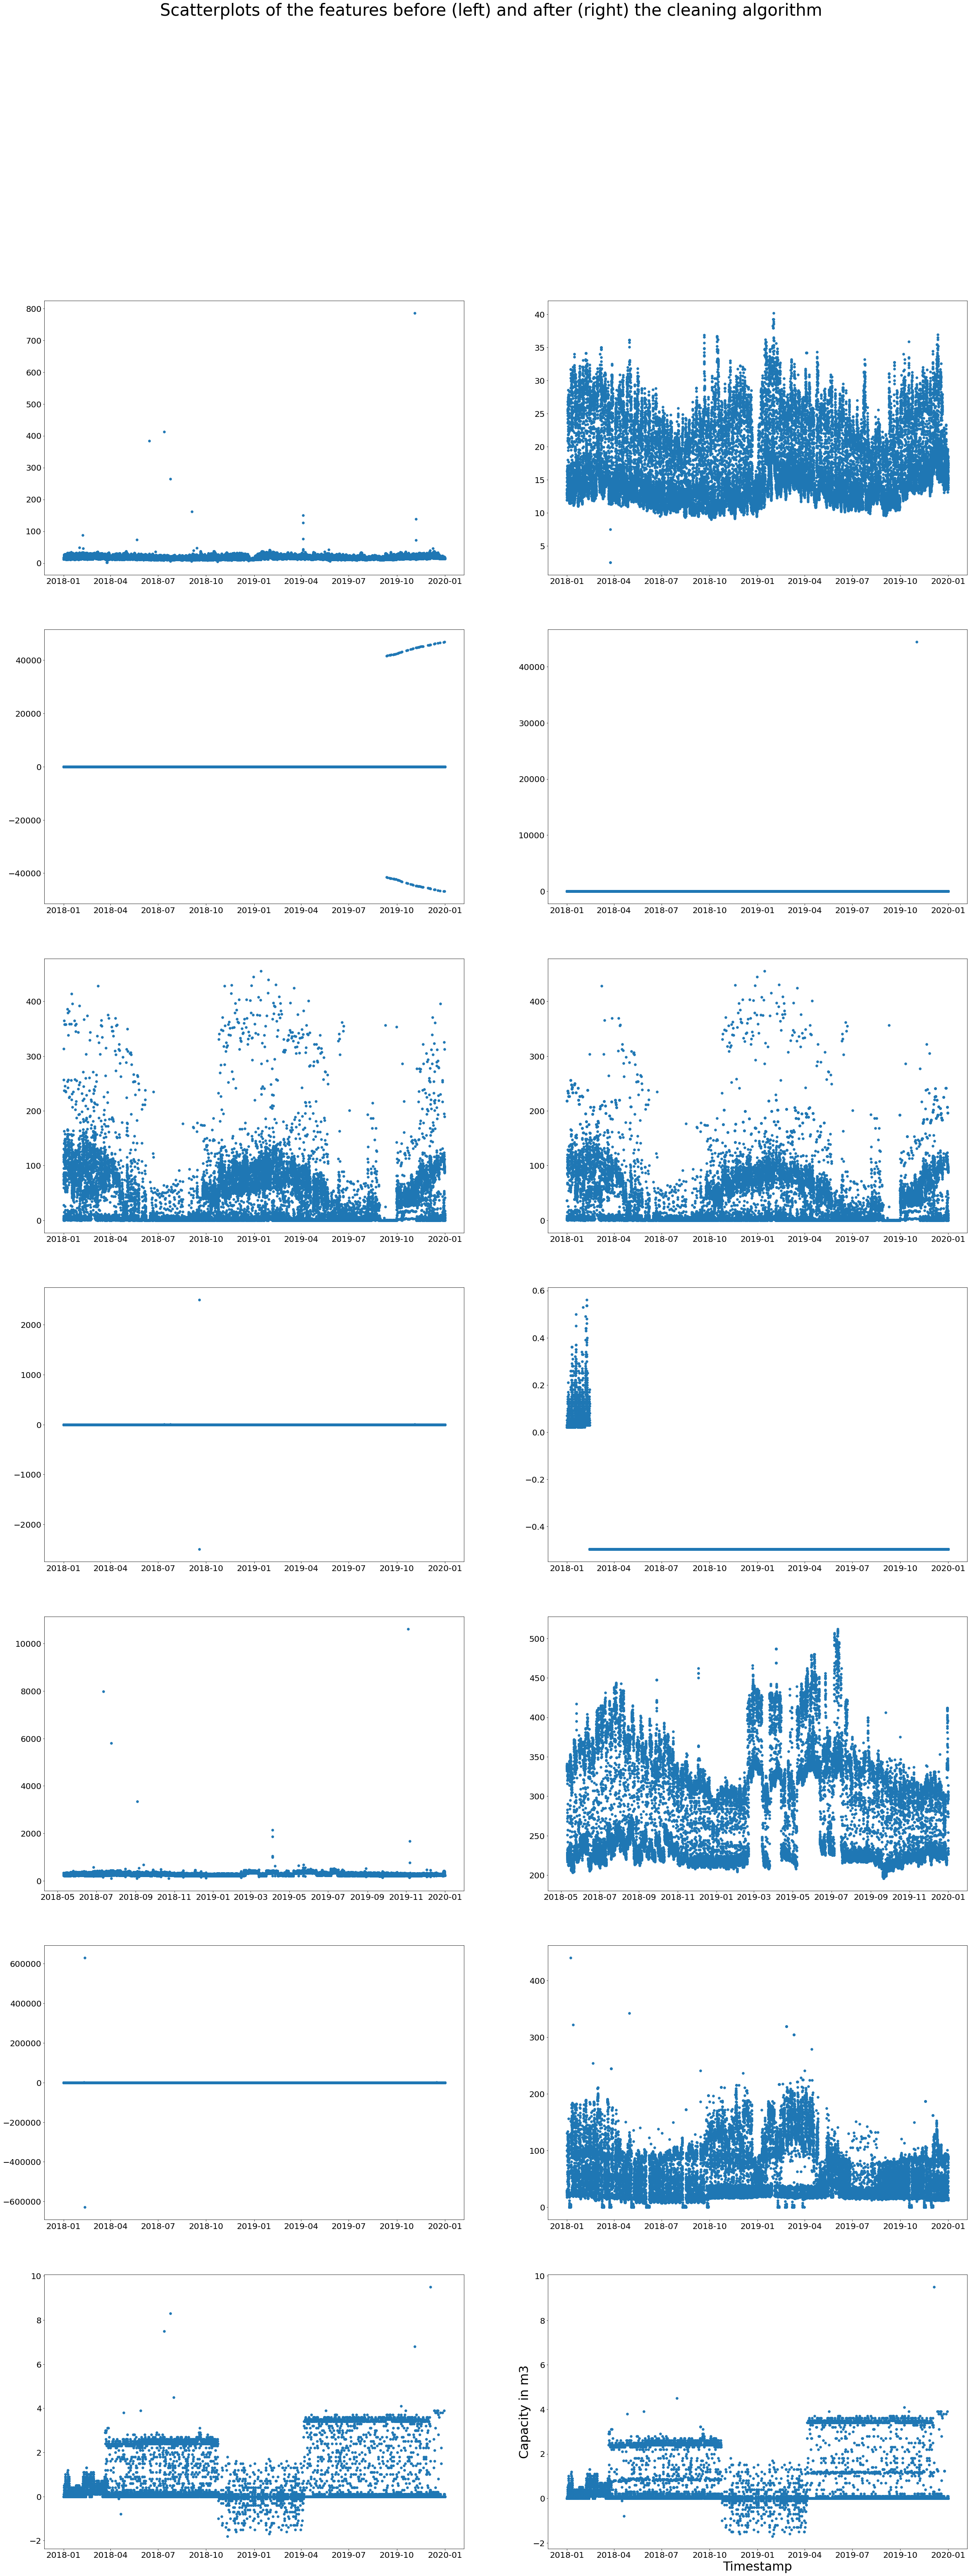

In [68]:
plt.rcParams['figure.figsize'] = [40, 100]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2)
fig.suptitle('Scatterplots of the features before (left) and after (right) the cleaning algorithm', fontsize = 40)
plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Electrical in kWh', fontsize = 30)
ax1.scatter(x = copy['From Timestamp'], y = copy['HH Electrical (kWh)'], s = 30)
ax1.tick_params(axis='both', which='major', labelsize=20)

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Electrical in kWh', fontsize = 30)
ax2.scatter(x = df['From Timestamp'], y = df['HH Electrical (kWh)'], s = 30)
ax2.tick_params(axis='both', which='major', labelsize=20)


plt.grid(which='major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Chilled Water (kWh)', fontsize = 30)
ax3.scatter(x = copy['From Timestamp'], y = copy['HH Chilled Water (kWh)'], s = 30)
ax3.tick_params(axis='both', which='major', labelsize=20)

plt.grid(which='major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Chilled Water (kWh)', fontsize = 30)
ax4.scatter(x = df['From Timestamp'], y = df['HH Chilled Water (kWh)'], s = 30)
ax4.tick_params(axis='both', which='major', labelsize=20)



plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in kWh', fontsize = 30)
ax5.scatter(x = copy['From Timestamp'], y = copy['HH LTHW (Heating) (kWh)'], s = 30)
ax5.tick_params(axis='both', which='major', labelsize=20)

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in kWh', fontsize = 30)
ax6.scatter(x = df['From Timestamp'], y = df['HH LTHW (Heating) (kWh)'], s = 30)
ax6.tick_params(axis='both', which='major', labelsize=20)



plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Capacity in m3', fontsize = 30)
ax7.scatter(x = copy['From Timestamp'], y = copy['HH CHW Capacity (m3)'], s = 30)
ax7.tick_params(axis='both', which='major', labelsize=20)

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Capacity in m3', fontsize = 30)
ax8.scatter(x = df['From Timestamp'], y = df['HH CHW Capacity (m3)'], s = 30)
ax8.tick_params(axis='both', which='major', labelsize=20)



plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in m3', fontsize = 30)
ax9.scatter(x = copy['From Timestamp'], y = copy['DE Electricity (kWh)'], s = 30)
ax9.tick_params(axis='both', which='major', labelsize=20)

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in kWh', fontsize = 30)
ax10.scatter(x = df['From Timestamp'], y = df['DE Electricity (kWh)'], s = 30)
ax10.tick_params(axis='both', which='major', labelsize=20)


plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in kWh', fontsize = 30)
ax11.scatter(x = copy['From Timestamp'], y = copy['DE LTHW (Heating) (kWh)'], s = 30)
ax11.tick_params(axis='both', which='major', labelsize=20)  

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in kWh', fontsize = 30)
ax12.scatter(x = df['From Timestamp'], y = df['DE LTHW (Heating) (kWh)'], s = 30)
ax12.tick_params(axis='both', which='major', labelsize=20)  


plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Energy in m3', fontsize = 30)
ax13.scatter(x = copy['From Timestamp'], y = copy['DE CHW Capacity (m3)'], s = 30)
ax13.tick_params(axis='both', which='major', labelsize=20)  

plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Capacity in m3', fontsize = 30)
ax14.scatter(x = df['From Timestamp'], y = df['DE CHW Capacity (m3)'], s = 30)
ax14.tick_params(axis='both', which='major', labelsize=20)  

In [63]:
df[(df['HH CHW Capacity (m3)'] < 5) | (df['HH CHW Capacity (m3)'] > 50)]



,From Timestamp,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),Unnamed: 8,Unnamed: 9
2085,2018-02-13 10:30:00,29.090000,0.6289,90.8,-0.496667,NaN,114.7,0.8,NaN,NaN
2086,2018-02-13 11:00:00,31.500000,0.5742,129.3,-0.496667,NaN,140.3,0.9,NaN,NaN
2087,2018-02-13 11:30:00,31.410000,0.6152,130.9,-0.173333,NaN,137.3,0.9,NaN,NaN
2088,2018-02-13 12:00:00,30.410000,0.7080,99.9,-0.173333,NaN,136.8,1.3,NaN,NaN
7867,2018-06-13 21:30:00,13.377419,0.7363,0.0,-0.113576,238.600000,16.1,0.3,NaN,NaN
7868,2018-06-13 22:00:00,13.377419,0.7070,0.0,-0.131510,238.600000,63.7,0.2,NaN,NaN
7869,2018-06-13 22:30:00,13.377419,0.6055,0.0,-0.149445,238.600000,16.7,0.3,NaN,NaN
7870,2018-06-13 23:00:00,13.377419,0.4805,0.0,-0.167379,238.500000,15.7,0.2,NaN,NaN
7871,2018-06-13 23:30:00,13.377419,0.4355,0.0,-0.185314,238.600000,66.2,0.3,NaN,NaN
7872,2018-06-14 00:00:00,13.377419,0.5098,0.0,-0.203248,238.600000,17.2,0.2,NaN,NaN


In [64]:
df.to_excel("output.xlsx")

Text(0.5, 1.0, 'HH Electrical (kWh)')

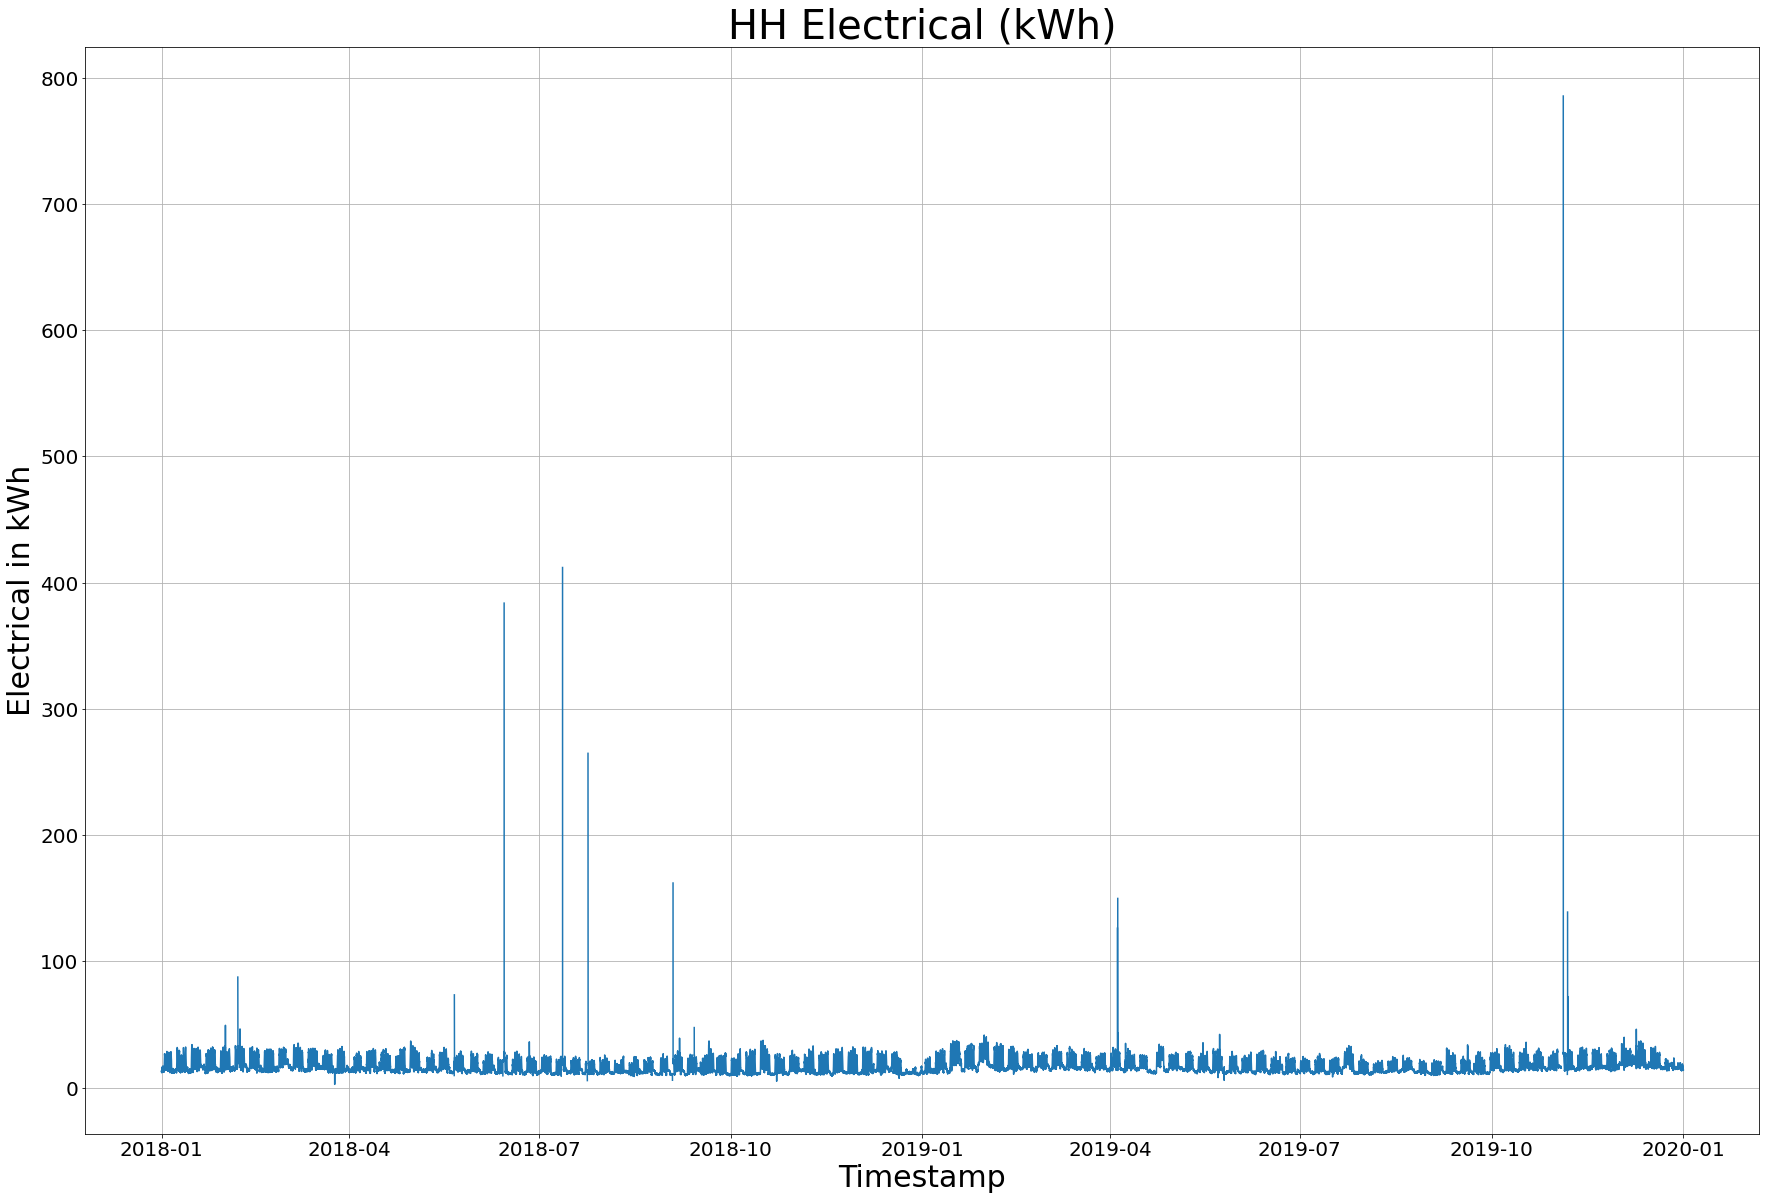

In [65]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.grid(which = 'major')
plt.xlabel('Timestamp', fontsize = 30)
plt.ylabel('Electrical in kWh', fontsize = 30)
plt.plot(copy['From Timestamp'], copy['HH Electrical (kWh)'])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('HH Electrical (kWh)', fontsize = 40)

